In [1]:
import urllib.request

import geopandas
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import pandas as pd
import planetary_computer
import pystac_client
import rioxarray
import xarray as xr
import odc.stac
import dask.distributed

In [2]:
from shapely import wkt

In [3]:
# https://boundingbox.klokantech.com/

region = wkt.loads(
    "POLYGON((-58.611677 -34.469254, -58.271327 -34.469254, -58.271327 -34.725584, -58.611677 -34.725584, -58.611677 -34.469254))"
)
bbox = region.bounds

In [4]:
start = pd.Timestamp("2020-01-01")
stop = pd.Timestamp("2020-01-03")

In [5]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1/",
    modifier=planetary_computer.sign_inplace,
)

#filter_query = {"eo:cloud_cover": {"lte": 20}}

query = catalog.search(
    collections=["cop-dem-glo-30"],
    #datetime=[start, stop],
    limit=100,  # Consider making this configurable
    bbox=bbox,
#    query=filter_query
)

items = list(query.items())

In [6]:
len(items)

1

In [7]:
items[0]

<Item id=Copernicus_DSM_COG_10_S35_00_W059_00_DEM>

In [8]:
ds = odc.stac.load(items, chunks={}, intersects=region)

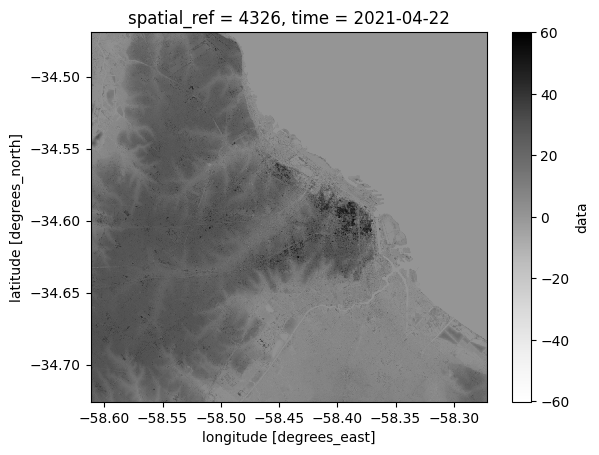

In [9]:
ds.data.plot(cmap='Greys')

In [10]:
from geocube.vector import vectorize

In [11]:
gdf = vectorize(ds.data)

In [12]:
gdf.head()

,data,geometry
0,4.443066,"POLYGON ((-58.61181 -34.46903, -58.61181 -34.4..."
1,3.665511,"POLYGON ((-58.61153 -34.46903, -58.61153 -34.4..."
2,4.232914,"POLYGON ((-58.61125 -34.46903, -58.61125 -34.4..."
3,2.641361,"POLYGON ((-58.61097 -34.46903, -58.61097 -34.4..."
4,3.499437,"POLYGON ((-58.61069 -34.46903, -58.61069 -34.4..."
